<h1> <center>CLL 788 : Process Data Analytics </center> </h1>
    <h2> <center> Assignment 2

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

<h2>Visualising data

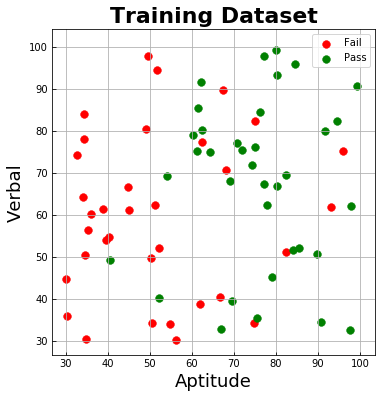

In [244]:
from pandas import DataFrame 

df = pd.read_excel("q1train.xlsx")
ons = np.ones(df.shape[0])
df['ONES'] = ons
cols = df.columns
newcols = [cols[-1],cols[0],cols[1],cols[2]]
df = df[newcols]
X = df[df.columns[0:-1]].values
df_train = df

X = df_train[df_train.columns[1:-1]]
Y = df_train[df_train.columns[-1]]
X = X.to_numpy()
Y = Y.to_numpy()
font = {'fontweight':600,'fontsize':22}   #for title
fon  = {'fontweight':500,'fontsize':18}   #for labels
fontl  = {'fontweight':500,'fontsize':12} #for text

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key == 0:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Fail', color=colors[key],s=60,ec='r',lw=0.5)
    if key == 1:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Pass', color=colors[key],s=60,ec='g',lw=0.5)
        
plt.xlabel('Aptitude',fon)
plt.ylabel('Verbal',fon)
plt.title('Training Dataset',font)
plt.tick_params(direction='in',which='both')
plt.gca().set_aspect('equal','box')
plt.grid()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('1_Training.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

<h2>Modifying data label to apply $perceptron$ criteria

In [245]:
def modifylabel(val):
    if val == 0:
        return -1
    else:
        return 1

<h2>Scoring function

In [246]:
def myscore(y,y_predicted):
    sahi = 0
    for i in range(len(y)):
        if y[i] == y_predicted[i]:
            sahi += 1
    accuracy = sahi/len(y)
#     print(accuracy)
    return accuracy

<h2>Activation Function

In [247]:
def activation(w,X):
    a = np.dot(w,X.T)
    for i in range(len(a)):
        if a[i] >= 0:
            a[i] = 1
        else:
            a[i] = -1
    return a

<h2>Prediction Function</h2> (also converts to original labels i.e. 0 and 1)

In [248]:
def prediction(w,X):
    y_pr = activation(w,X)
    return y_pr

<h2> Preparing data for training

In [249]:
df = pd.read_excel("q1train.xlsx")
X = df[df.columns[0:-1]].values
# s = np.random.get_state()
print(df.sample(5))
df['Label']=df['Label'].apply(modifylabel)
y = (df[df.columns[-1]].values).reshape(-1,1)
w = np.array([0,0])
# w = np.random.rand(2)
w = np.array([0.88, 0.68])
# s = np.random.set_state(s)
print(df.sample(5))
y_ = y

     Aptitude     Verbal  Label
6   39.638339  54.071052      0
46  89.776776  50.634788      1
8   67.472028  89.776776      0
20  51.647720  94.543368      0
68  80.379574  66.846719      1
     Aptitude     Verbal  Label
46  89.776776  50.634788      1
57  97.871599  62.173064      1
61  99.372527  90.646714      1
2   35.947409  60.282599     -1
30  30.158822  44.768262     -1


<h2>Training starts

In [250]:
#Learning rate
alpha = 0.00001
iter=0
accu = []
weights = ()
y = df['Label']
while iter<100:
    temp = np.zeros(2)
    a = activation(w,X)
    for i in range(len(y)):
        a = prediction(w,X)
        if df.Label[i]!=a[i]:
    
            temp[0] = w[0] + alpha*(df.Label[i])*X[i,0]
            temp[1] = w[1] + alpha*(df.Label[i])*X[i,1]
            w = temp
            y_pred = prediction(w,X)
            accu.append(myscore(y,y_pred))
        if myscore(y,y_pred) > 0.7:
            w_ = w
            weights = weights + (w_,)
            y_p_per=prediction(w_,X)
            print(weights)
            print(myscore(y,y_pred))
            print(y_p_per)
            yy = y_p_per
            for i in range(len(yy)):
                if yy[i] == -1:
                    yy[i] = 0
                else:
                    pass
            break
    iter+=1

(array([ 0.17489314, -0.1294071 ]),)
0.7142857142857143
[ 1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1.
  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
(array([ 0.17489314, -0.1294071 ]), array([ 0.1745459 , -0.12971096]))
0.7142857142857143
[ 1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1.
  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
(array([ 0.17489314, -0.1294071 ]), array([ 0.1745459 , -0.12971096]), array([ 0.17419867, -0.13001483]))
0.7142857142857143
[ 1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1.
  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.
  1.  1.  1. 

<h2>Visualizing predictions on training dataset

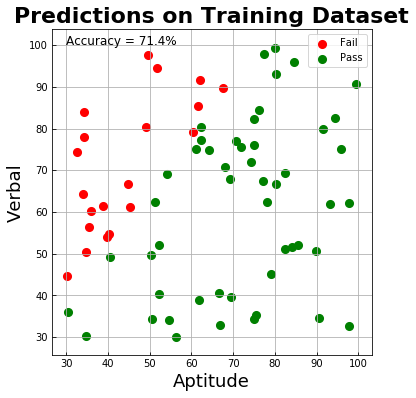

In [259]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=yy))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key == 0:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Fail', color=colors[key],s=50,ec='r',lw=2)
    if key == 1:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Pass', color=colors[key],s=50,ec='g',lw=2)
        
plt.xlabel('Aptitude',fon)
plt.ylabel('Verbal',fon)
plt.title('Predictions on Training Dataset',font)
plt.tick_params(direction='in',which='both')
plt.gca().set_aspect('equal','box')
plt.grid()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.text(30,100,"Accuracy = 71.4%",fontl)
fig.savefig('1_Predict_Train.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

<h3>For q1test.xlsx

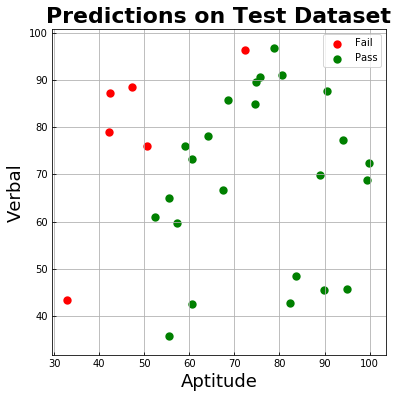

In [261]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df_test = pd.read_excel('q1test.xlsx')

X = df_test[df_test.columns[:]]
X['ones'] = np.ones(len(X))
cols = X.columns.to_list()
cols = cols[-1:] + cols[:-1]
X = df_test
X = X.to_numpy()
Y = prediction(w_,X)
for i in range(len(Y)):
    if Y[i] == -1:
        Y[i] = 0
Y = np.rint(Y)
Y = Y.astype(int)


font = {'fontweight':600,'fontsize':22}   #for title
fon  = {'fontweight':500,'fontsize':18}   #for labels
fontl  = {'fontweight':500,'fontsize':12} #for text

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key == 0:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Fail', color=colors[key],s=40,ec='r',lw=2)
    if key == 1:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Pass', color=colors[key],s=40,ec='g',lw=2)
        
plt.xlabel('Aptitude',fon)
plt.ylabel('Verbal',fon)
plt.title('Predictions on Test Dataset',font)
plt.tick_params(direction='in',which='both')
# plt.gca().set_aspect('equal','box')
plt.grid()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('1_Predict_Test.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

<h2><center>Question 2</center></h2>
Letclass1havethe5samplesc1=[(1,2),(2,3),(3,3)(4,5),(5,5)]andletclass2 have 6 samples: c2 = [(1,0),(2,1),(3,1),(3,2),(5,3),(6,5)]. <br>Using discriminant analysis find projections y1 & y2 respectively for c1 & c2. <br>
<p><p>Note : This question has to be done manually.


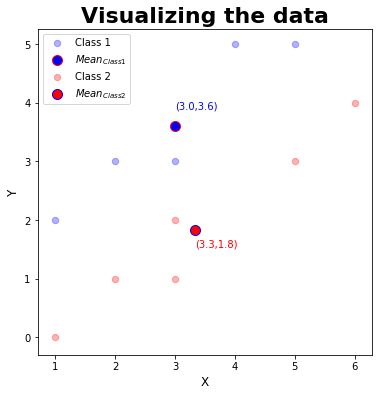

In [331]:
x1 = np.array([1,2,3,4,5])
y1 = np.array([2,3,3,5,5])

x2 = np.array([1,2,3,3,5,6])
y2 = np.array([0,1,1,2,3,4])

plt.scatter(x1,y1,s=40,color='blue',alpha=0.3,label='Class 1')
m_x1 = x1.sum(axis=0)/len(x1)
m_y1 = y1.sum(axis=0)/len(y1)
plt.scatter(m_x1,m_y1,s=100,color='blue',ec='red',label='$Mean_{Class 1}$')
plt.text(m_x1,m_y1+0.3,('(%0.1f,%0.1f)'%(m_x1,m_y1)),color='blue')

plt.scatter(x2,y2,s=40,color='red',alpha=0.3,label='Class 2')
m_x2 = x2.sum(axis=0)/len(x2)
m_y2 = y2.sum(axis=0)/len(y2)
plt.scatter(m_x2,m_y2,s=100,color='red',ec='blue',label='$Mean_{Class 2}$')
plt.text(m_x2,m_y2-0.3,('(%0.1f,%0.1f)'%(m_x2,m_y2)),color='red')
plt.legend()
plt.xlabel('X',fontl)
plt.ylabel('Y',fontl)
plt.title('Visualizing the data',font)
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('2_visualize.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()


In [307]:
D1 = np.array([[x1],[y1]])
D2 = np.array([[x2],[y2]])

In [319]:
r1_1 = D1[0]-m_x1
r2_1 = D1[1]-m_y1 
a1 = np.array([r1_1,r2_1])

r1_2 = D2[0]-m_x2
r2_2 = D2[1]-m_y2 
a2 = np.array([[r1_2],[r2_2]])



In [321]:
a1

array([[[-2. , -1. ,  0. ,  1. ,  2. ]],

       [[-1.6, -0.6, -0.6,  1.4,  1.4]]])

In [332]:
a2

array([[[[-2.33333333, -1.33333333, -0.33333333, -0.33333333,
           1.66666667,  2.66666667]]],


       [[[-1.83333333, -0.83333333, -0.83333333,  0.16666667,
           1.16666667,  2.16666667]]]])